In [35]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[]


In [2]:
physical_devices = tf.config.experimental.list_physical_devices()
print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
print(tf.__version__)

2.5.0


In [9]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
import tensorflow_

In [2]:
df = pd.read_csv('./Datasets/bank_churn.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [4]:
df.shape

(10000, 11)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

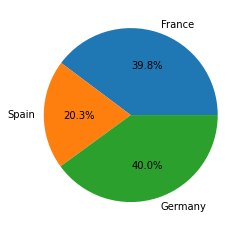

In [7]:
fr_exited = len(df[(df.Geography == 'France') & (df.Exited == 1)])
sp_exited = len(df[(df.Geography == 'Spain') & (df.Exited == 1)])
gr_exited = len(df[(df.Geography == 'Germany') & (df.Exited == 1)])

plt.pie([fr_exited,sp_exited,gr_exited], labels=['France','Spain','Germany'],autopct='%1.1f%%')
plt.show()

In [8]:
df.drop(['Geography'], axis='columns', inplace=True)

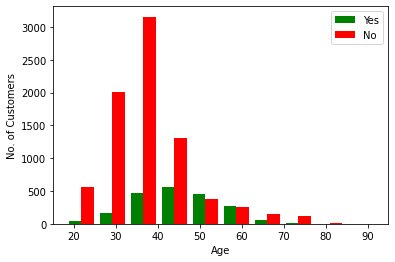

In [9]:
age_exited_yes = df.Age[df.Exited == 1]
age_exited_no = df.Age[df.Exited == 0]

plt.xlabel('Age')
plt.ylabel("No. of Customers")
plt.hist([age_exited_yes,age_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

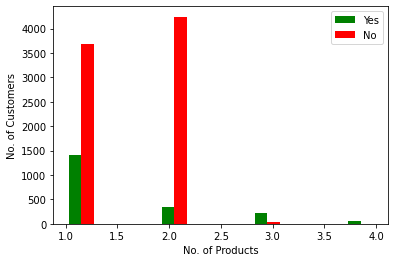

In [10]:
products_exited_yes = df.NumOfProducts[df.Exited == 1]
products_exited_no = df.NumOfProducts[df.Exited == 0]

plt.xlabel('No. of Products')
plt.ylabel("No. of Customers")
plt.hist([products_exited_yes,products_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

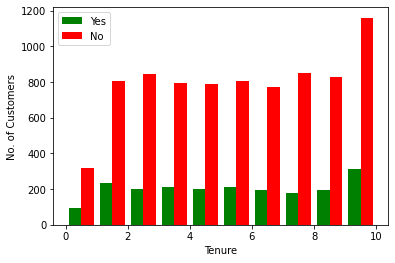

In [11]:
tenure_exited_yes = df.Tenure[df.Exited == 1]
tenure_exited_no = df.Tenure[df.Exited == 0]

plt.xlabel('Tenure')
plt.ylabel("No. of Customers")
plt.hist([tenure_exited_yes,tenure_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

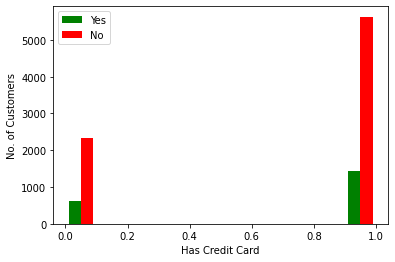

In [14]:
crCard_exited_yes = df.HasCrCard[df.Exited == 1]
crCard_exited_no = df.HasCrCard[df.Exited == 0]

plt.xlabel('Has Credit Card')
plt.ylabel("No. of Customers")
plt.hist([crCard_exited_yes,crCard_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

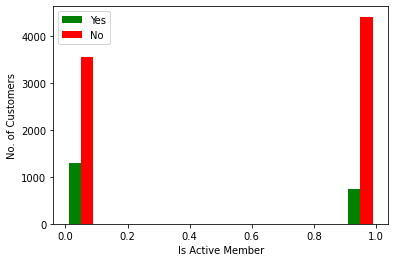

In [13]:
activeMem_exited_yes = df.IsActiveMember[df.Exited == 1]
activeMem_exited_no = df.IsActiveMember[df.Exited == 0]

plt.xlabel('Is Active Member')
plt.ylabel("No. of Customers")
plt.hist([activeMem_exited_yes,activeMem_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

In [15]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
df.Gender.replace({'Male': 1, 'Female':0}, inplace=True)

In [17]:
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [18]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary','Age','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()


CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       0  0.324324     0.2  0.000000              1          1   
1        0.516       0  0.310811     0.1  0.334031              1          0   
2        0.304       0  0.324324     0.8  0.636357              3          1   
3        0.698       0  0.283784     0.1  0.000000              2          0   
4        1.000       0  0.337838     0.2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1         0.506735       1  
1               1         0.562709       0  
2               0         0.569654       1  
3               0         0.469120       0  
4               1         0.395400       0

In [20]:
X = df.drop(['Exited'], axis='columns')
y = df.Exited

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile( optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
219/219 [==============================] - 3s 2ms/step - loss: 0.6031 - accuracy: 0.6861
Epoch 2/200
219/219 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7940
Epoch 3/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7943
Epoch 4/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7943
Epoch 5/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7946
Epoch 6/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7947
Epoch 7/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7963
Epoch 8/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7984
Epoch 9/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.8019
Epoch 10/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4548 - accura

219/219 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8443
Epoch 161/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8414
Epoch 162/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8426
Epoch 163/200
219/219 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8404
Epoch 164/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8417
Epoch 165/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8439
Epoch 166/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8414
Epoch 167/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8427
Epoch 168/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8433
Epoch 169/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3711 - a

In [22]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8417


[0.378133624792099, 0.8416666388511658]

In [23]:
y_pred = model.predict(X_test)
y_pred

array([[0.03658491],
       [0.08646649],
       [0.11038992],
       ...,
       [0.04538715],
       [0.00500742],
       [0.13858515]], dtype=float32)

In [24]:
y_preds = []
for y in y_pred:
    if y>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2403
           1       0.67      0.40      0.50       597

    accuracy                           0.84      3000
   macro avg       0.77      0.68      0.70      3000
weighted avg       0.83      0.84      0.83      3000



In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2286,  117],
       [ 358,  239]])>

Text(33.0, 0.5, 'true')

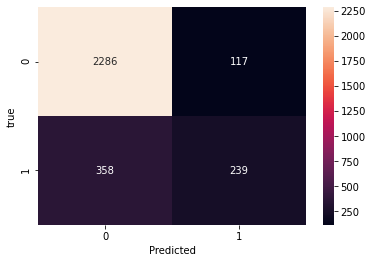

In [27]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("true")

In [36]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile( optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=200)
    model.evaluate(X_test,y_test)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    print(classification_report(y_test,y_pred))
    return y_pred

## i) Under Sampling

In [30]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [31]:
count_class_0, count_class_1 = df.Exited.value_counts()

df_class_0 = df[df.Exited == 0]
df_class_1 = df[df.Exited == 1]

In [32]:
df_class_0_under = df_class_0.sample(count_class_1)

df_under = pd.concat([df_class_0_under,df_class_1], axis=0)

In [33]:
df_under.shape

(4074, 10)

In [37]:
X = df_under.drop('Exited',axis=1)
y = df_under.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

y_pred_under = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/200
102/102 [==============================] - 1s 1ms/step - loss: 0.6979 - accuracy: 0.4876
Epoch 2/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5486
Epoch 3/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5919
Epoch 4/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6210
Epoch 5/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6303
Epoch 6/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6413
Epoch 7/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6573
Epoch 8/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6585
Epoch 9/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6643
Epoch 10/200
102/102 [==============================] - 0s 1ms/step - loss: 0.6172 - accura

Epoch 81/200
102/102 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7536
Epoch 82/200
102/102 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7536
Epoch 83/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7521
Epoch 84/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7542
Epoch 85/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7527
Epoch 86/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7548
Epoch 87/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7570
Epoch 88/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7576
Epoch 89/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7539
Epoch 90/200
102/102 [==============================] - 0s 1ms/step - loss: 0.5049

## Over Samplingb

In [38]:
count_class_0, count_class_1

(7963, 2037)

In [39]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [40]:
df_over = pd.concat([df_class_0,df_class_1_over], axis=0)

In [41]:
df_over.shape

(15926, 10)

In [42]:
X = df_over.drop('Exited',axis=1)
y = df_over.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

y_pred_over = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5597
Epoch 2/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6482 - accuracy: 0.6419
Epoch 3/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6196 - accuracy: 0.6662
Epoch 4/200
399/399 [==============================] - 1s 2ms/step - loss: 0.5968 - accuracy: 0.6769
Epoch 5/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5801 - accuracy: 0.6943
Epoch 6/200
399/399 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7089
Epoch 7/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5588 - accuracy: 0.7119
Epoch 8/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7170
Epoch 9/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7210
Epoch 10/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5414 - accura

399/399 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7491
Epoch 161/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7480
Epoch 162/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7480
Epoch 163/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7508
Epoch 164/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7506: 0s - loss: 0.4821 - accu
Epoch 165/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7494
Epoch 166/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7481
Epoch 167/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7485
Epoch 168/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7506
Epoch 169/200
399/399 [==============================] - 0s 1

## SMOTE

In [43]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy='minority')

In [46]:
X_smot, y_smot = smote.fit_resample(X,y)

In [49]:
y_smot.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_smot, y_smot, test_size = 0.2, random_state=15, stratify=y_smot)

y_pred_smot = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6708 - accuracy: 0.5871
Epoch 2/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6378 - accuracy: 0.6363
Epoch 3/200
399/399 [==============================] - 1s 2ms/step - loss: 0.6196 - accuracy: 0.6530
Epoch 4/200
399/399 [==============================] - 1s 2ms/step - loss: 0.6058 - accuracy: 0.6693
Epoch 5/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5962 - accuracy: 0.6811
Epoch 6/200
399/399 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.6878
Epoch 7/200
399/399 [==============================] - 1s 3ms/step - loss: 0.5839 - accuracy: 0.6951
Epoch 8/200
399/399 [==============================] - 1s 2ms/step - loss: 0.5798 - accuracy: 0.6987
Epoch 9/200
399/399 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.6994
Epoch 10/200
399/399 [==============================] - 1s 2ms/step - loss: 0.5739 - accura

399/399 [==============================] - 1s 1ms/step - loss: 0.4590 - accuracy: 0.7734
Epoch 160/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4584 - accuracy: 0.7793
Epoch 161/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4582 - accuracy: 0.7767
Epoch 162/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4583 - accuracy: 0.7765
Epoch 163/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4587 - accuracy: 0.7749
Epoch 164/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4583 - accuracy: 0.7757
Epoch 165/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7761
Epoch 166/200
399/399 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7775
Epoch 167/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4582 - accuracy: 0.7776
Epoch 168/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4574 - a